Created by [Nathan Kelber](http://nkelber.com) and Ted Lawless for [JSTOR Labs](https://labs.jstor.org/) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
**For questions/comments/improvements, email nathan.kelber@ithaka.org.**<br />
![CC BY License Logo](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png)
____

# Exploring Metadata

**Description of methods in this notebook:**
This [notebook](https://docs.tdm-pilot.org/key-terms/#jupyter-notebook) shows how to explore the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) of your [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor) and/or [Portico](https://docs.tdm-pilot.org/key-terms/#portico) [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) using [Python](https://docs.tdm-pilot.org/key-terms/#python). The following processes are described:

* Automatically importing your [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor) and/or [Portico](https://docs.tdm-pilot.org/key-terms/#portico) [dataset](https://docs.tdm-pilot.org/key-terms/#dataset)
* Converting your [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor) and/or [Portico](https://docs.tdm-pilot.org/key-terms/#portico) [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) into a Python list
* Using the `.get` method to retrieve bibliographic metadata
* Checking if an item is in your [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) against the dataset metadata
* Turning your [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) into a [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) dataframe
* Filtering out [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) materials like journal front matter, back matter, notes, etc.
* Visualizing the contents of your [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) dataframe by decade

**Difficulty:** Intermediate

**Knowledge Required:** 
* [Python Basics I](./0-python-basics-1.ipynb)
* [Python Basics II](./0-python-basics-2.ipynb)
* [Python Basics III](./0-python-basics-3.ipynb)

**Knowledge Recommended:**

* Read ["What is a JSTOR/Portico dataset (format and structure"](https://docs.tdm-pilot.org/what-format-are-jstor-portico-datasets/)
* A familiarity with [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) is helpful but not required.

**Completion time:** 45 minutes

**Data Format:** [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor)/[Portico](https://docs.tdm-pilot.org/key-terms/#portico) [JSON Lines (.jsonl)](https://docs.tdm-pilot.org/key-terms/#jsonl)

**Libraries Used:**
* [json](https://docs.tdm-pilot.org/key-terms/#json-python-library) to convert our dataset from json lines format to a Python list
* [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) to help visualize the metadata
____

## Import your dataset

We'll use the `tdm_client` library to automatically upload your dataset. We import the `Dataset` module from the `tdm_client` library. The tdm_client library contains functions for connecting to the JSTOR server containing the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) [dataset](https://docs.tdm-pilot.org/key-terms/#dataset). To analyze your dataset, use the [dataset ID](https://docs.tdm-pilot.org/key-terms//#dataset-ID) provided when you created your [dataset](https://docs.tdm-pilot.org/key-terms//#dataset). A copy of your [dataset ID](https://docs.tdm-pilot.org/key-terms//#dataset-ID) was sent to your email when you created your [corpus](https://docs.tdm-pilot.org/key-terms/#corpus). It should look like a long series of characters surrounded by dashes. If you haven't created a dataset, feel free to use a sample dataset. Here's a [list by discipline](https://docs.tdm-pilot.org/sample-datasets/). Advanced users can also [upload a dataset from their local machine](https://docs.tdm-pilot.org/uploading-a-dataset/).

In [1]:
#Importing your dataset with a dataset ID
import tdm_client
#Load the sample dataset, the full run of Shakespeare Quarterly from 1950-2013.
tdm_client.get_dataset("7e41317e-740f-e86a-4729-20dab492e925", "sampleJournalAnalysis")

'datasets/sampleJournalAnalysis.jsonl'

Before we can begin working with our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset), we need to convert the [JSON lines](https://docs.tdm-pilot.org/key-terms/#jsonl) file format into [Python](https://docs.tdm-pilot.org/key-terms/#python) so we can work with it. Remember that each line of our [JSON lines](https://docs.tdm-pilot.org/key-terms/#jsonl) file represents a single text, whether that is a journal article, book, or something else. We will create a [Python](https://docs.tdm-pilot.org/key-terms/#python) list that contains every document. Within each list item for each document, we will use a [Python dictionary](https://docs.tdm-pilot.org/key-terms/#python-dictionary) of [key/value pairs](https://docs.tdm-pilot.org/key-terms/#key-value-pair) to store information related to that document. [Read more about the dataset format](https://docs.tdm-pilot.org/what-format-are-jstor-portico-datasets/).

Essentially we will have a [list](https://docs.tdm-pilot.org/key-terms/#python-list) of documents numbered, from zero to the last document. Each [list](https://docs.tdm-pilot.org/key-terms/#python-list) item then will be composed of a [dictionary](https://docs.tdm-pilot.org/key-terms/#python-dictionary) of [key/value pairs](https://docs.tdm-pilot.org/key-terms/#key-value-pair) that allows us to retrieve information from that particular document by number. The structure will look something like this:

![Structure of the corpus, a list of dictionaries](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CorpusView.png)

For each item in our list we will be able to use [key/value pairs](https://docs.tdm-pilot.org/key-terms/#key-value-pair) to get a **value** if we supply a **key**. We will call our [Python list](https://docs.tdm-pilot.org/key-terms/#python-list) variable `all_documents` since it will contain all of the documents in our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus).

In [2]:
# Replace with your filename and be sure your file is in your datasets folder
file_name = 'sampleJournalAnalysis.jsonl' 

# Import the json module
import json
# Create an empty new list variable named `all_documents`
all_documents = [] 
# Temporarily open the file `filename` in the datasets/ folder
with open('./datasets/' + file_name) as dataset_file: 
    #for each line in the dataset file
    for line in dataset_file: 
        # Read each line into a Python dictionary.
        # Create a variable document that contains the line using json.loads to convert the json key/value pairs to a python dictionary
        document = json.loads(line) 
        # Append a new list item to `all_documents` containing the dictionary we created.
        all_documents.append(document) 

Now all of our documents have been converted from our original [JSON lines](https://docs.tdm-pilot.org/key-terms/#jsonl) file format (.jsonl) into a [python List](https://docs.tdm-pilot.org/key-terms/#python-list) variable named `all_documents`. Let's see what we can discover about our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) with a few simple methods.

First, we can determine how many texts are in our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset) by using the `len()` function to get the size of `all_documents`. 

In [3]:
len(all_documents)

6745

---
## Exploring the Metadata of a Single Article

We can also choose a single document and get [bibliographic metadata](https://docs.tdm-pilot.org/key-terms/#bibliographic-metadata) for that item. First we select a document from our list ```all_documents```. (In computer code, 0 is the first item, 1 is the second item, 2 is the third item, etc.) If we wanted to select the first item, we could use the `.get` method to retrieve the title for the item in our [list](https://docs.tdm-pilot.org/key-terms/#python-list) by writing `all_documents[0]`. 


In [6]:
# Define a new dictionary variable `chosenDocument` that is equal to a single item in our `all_documents` list
chosen_document = all_documents[2] # Select the first document in our list
chosen_document.get('title') #get the corresponding value for the key 'title'

'Will and Reason in Troilus and Cressida'

We can also use the `.get` method to discover additional [bibliographic metadata](https://docs.tdm-pilot.org/key-terms/#bibliographic-metadata). Here are the most significant [bibliographic metadata](https://docs.tdm-pilot.org/key-terms/#bibliographic-metadata) items found with a [JSTOR](https://docs.tdm-pilot.org/key-terms/#jstor) item:
* `title` returns the title
* `creators` returns the authors in a Python list
* `isPartOf` returns the journal title
* `datePublished` returns the publication date
* `id` returns the stable URL for a JSTOR item
* `identifier` returns a Python list of dictionaries containing the ISSN #, OCLC #, and DOI #. 
* `volumeNumber` returns the journal volume number
* `pageCount` returns the number of pages in the print article
* `pagination` returns the page number range of the print article
* `pageStart` returns the first print page
* `pageEnd` returns the last print page
* `wordCount` returns the number of words in the article
* `docType` returns the type of document, usually `article` for journal article
* `url` returns the stable url for the document
* `provider` returns the source of the data, for JSTOR articles usually `jstor`
* `language` returns the language the article is written in

Let's try all these on our `chosenDocument`. 

In [8]:
print("Title: " + chosen_document.get('title'))
print("Authors: ", end='')
print(chosen_document.get('creator'))
print("Journal: " + chosen_document.get('isPartOf'))
print("Publication Date: " + chosen_document.get('datePublished'))
#print("Publisher: " + chosen_document.get('publisher'))
print("ID: " + chosen_document.get('id'))
print("ISSN, OCLC, DOI: ", end='')
print(chosen_document.get('identifier'))
#print("Volume Number: " + chosen_document.get('volumeNumber'))
print("Number of Pages: " + str(chosen_document.get('pageCount')))
print("Print Pagination: " + str(chosen_document.get('pagination')))
print("First Page: " + str(chosen_document.get('pageStart')))
print("Last Page: " + str(chosen_document.get('pageEnd')))
print("Number of words: " + str(chosen_document.get('wordCount')))
print("Document Type: " + chosen_document.get('docType'))
print("URL: " + chosen_document.get('url'))
print("Provider: " + chosen_document.get('provider'))
print("Language: " + str(chosen_document.get('language')))

Title: Will and Reason in Troilus and Cressida
Authors: ['David Kaula']
Journal: Shakespeare Quarterly
Publication Date: 1961-07-01
ID: http://www.jstor.org/stable/2867059
ISSN, OCLC, DOI: [{'name': 'issn', 'value': '00373222'}, {'name': 'oclc', 'value': '39852252'}, {'name': 'lccn', 'value': 'sn98-23302'}, {'name': 'local_doi', 'value': '10.2307/2867059'}, {'name': 'journal_id', 'value': 'shakquar'}]
Number of Pages: 13
Print Pagination: pp. 271-283
First Page: 271
Last Page: 283
Number of words: 7137
Document Type: article
URL: http://www.jstor.org/stable/2867059
Provider: jstor
Language: ['eng']


We can see every [Python dictionary](https://docs.tdm-pilot.org/key-terms/#python-dictionary) **key** in the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) by using the `.keys` method. We could use this in conjunction with the `print()` function, but we will use the `list()` function here to make it a little neater for reading purposes.

In [9]:
#print(chosen_document.keys())# Uncomment the # in front of print to run this line of code
list(chosen_document.keys()) # Create a list of every Python dictionary key within `chosen_document`

['id',
 'docType',
 'title',
 'creator',
 'isPartOf',
 'sourceCategory',
 'pageStart',
 'url',
 'volumeNumber',
 'issueNumber',
 'language',
 'pageEnd',
 'pageCount',
 'pagination',
 'datePublished',
 'publicationYear',
 'publisher',
 'wordCount',
 'provider',
 'outputFormat',
 'identifier',
 'unigramCount',
 'bigramCount',
 'trigramCount']

Of course, we could also list all the [Python dictionary](https://docs.tdm-pilot.org/key-terms/#python-dictionary) **values**, but the output will be quite long since it includes the word counts for every word that is in the article. (In fact, it includes the count for every unique [string](https://docs.tdm-pilot.org/key-terms/#string) in the article. We'll address the distinction in the [word frequencies](https://docs.tdm-pilot.org/key-terms/#word-frequency) [notebooks](https://docs.tdm-pilot.org/key-terms/#jupyter-notebook).) The word counts are found within `unigramCount` which we'll address in the word frequencies notebook. 

In [ ]:
# Uncomment the # in the next line to display all values in chosen_document
list(chosen_document.values())

---
## Checking if a particular document is in the corpus

Let's return to our larger [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) `all_documents` to do some exploratory analysis. What if we wanted to check if a particular item was in the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus)?

Assuming the item is from JSTOR, we could search out any journal article on jstor.org. The article description page will feature a stable url.

![A JSTOR description page](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/jstorDescription.png)

We already saw above that the stable URL is stored in both the `id` and `url` dictionaries, so we can check our whole [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) for a particular JSTOR article if we know the stable URL. (If we are looking at a Portico item, they will have an `id` that starts with `ark://` and `url` that lists a `doi`.) From the image above, we can see the article in question has a stable URL of: https://www.jstor.org/stable/2871420

We can check whether the item above is in `all_documents` with the `in` or `not in` operators. First though, we need a list of all of the URLs in our corpus. We'll create a variable `list_of_urls` to hold all these values. Then we can check to see if our stable URL (http://www.jstor.org/stable/2871420) is in that list.

In [11]:
# We create a blank list that will contain all of the urls in our dataset
list_of_urls = [] 
# For every document in our dataset
for document in all_documents:
    # Create a url_value variable to hold the URL for that document
    url_value = document.get('url') 
    # Append or add that URL to our Python list `list_of_urls`
    list_of_urls.append(url_value)
# Show the first five items in our list of urls
list(list_of_urls[0:5]) 

['http://www.jstor.org/stable/2871374',
 'http://www.jstor.org/stable/2871200',
 'http://www.jstor.org/stable/2867059',
 'http://www.jstor.org/stable/2868190',
 'http://www.jstor.org/stable/2867247']

Now that we have a [list](https://docs.tdm-pilot.org/key-terms/#python-list) of all the URLs in our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) in the `list_of_urls` variable, let's use the `in` operator to discover whether our text is in the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus). If the article is in our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset), we will receive `true`. If the article is not our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset), we will receive `false`.

*Note that the stable URL from jstor.org uses a secure address starting with "https://". Our dictionary values, however, use a standard address beginning with "http://".
* http**s**://
* http://

You'll need to remove the "s" to run this test since our `list_of_urls` are not secure addresses.

In [14]:
'http://www.jstor.org/stable/24778550' in list_of_urls

True

Now we have a good idea of what [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) is in our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) and how we might retrieve it. We were able to use the `in` operator above to check if a particular article was in the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) using the URL. Of course, we could also check to see if a particular journal, author, publisher, or DOI # was in our corpus using a similar method. 

We'll finish this [notebook](https://docs.tdm-pilot.org/key-terms/#jupyter-notebook) by taking a big picture look at the [corpus](https://docs.tdm-pilot.org/key-terms/#corpus). What largescale patterns exist in this [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) over the decades? We'll use [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) to help with our analysis. If you would like to learn more about [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas), we recommend the [Python Pandas tutorial at learndatasci.com](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/). For now, we will create a couple visualizations for demonstration purposes.

---
## Explore Corpus Metadata with Pandas

In [15]:
# Imports pandas and allows us to call it with the phrase pd
import pandas as pd

To use [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas), we need to import it first. The `as pd` lets us use the shorthand `pd` when we want to call [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) instead writing out the entire word `pandas`. 

Now we can turn our [Python list](https://docs.tdm-pilot.org/key-terms/#python-list) `all_documents` into a [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe). This will enable us to manipulate and view our data as a table or a graph. We will call our [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe) `df`.

In [16]:
df = pd.DataFrame(all_documents)

Let's see what our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) looks like in table form. We can use the `.head()` method to show us the first five rows of our data as a table.

In [17]:
df.head()

,id,docType,title,isPartOf,sourceCategory,pageStart,url,volumeNumber,issueNumber,language,...,publisher,wordCount,provider,outputFormat,identifier,unigramCount,bigramCount,trigramCount,creator,abstract
0,http://www.jstor.org/stable/2871374,article,Subject Index,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",840,http://www.jstor.org/stable/2871374,48,5,[eng],...,Folger Shakespeare Library,6128,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'Shakespeare': 89, 'Festival,': 44, 'Company,...","{'Shakespeare Festival,': 35, 'Shakespeare Com...","{'Shakespeare in the': 6, '(Merchant of Venice...",NaN,NaN
1,http://www.jstor.org/stable/2871200,article,Shakespeare In Edinburgh,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",222,http://www.jstor.org/stable/2871200,36,2,[eng],...,Folger Shakespeare Library,2961,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'the': 155, 'and': 89, 'of': 84, 'a': 73, 'to...","{'of the': 19, 'in the': 15, 'of a': 7, 'to th...","{'Running time 2': 5, 'time 2 hours,': 5, 'wit...",[Gerald M. Berkowitz],NaN
2,http://www.jstor.org/stable/2867059,article,Will and Reason in Troilus and Cressida,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",271,http://www.jstor.org/stable/2867059,12,3,[eng],...,Folger Shakespeare Library,7137,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'the': 485, 'of': 334, 'and': 194, 'to': 184,...","{'of the': 82, 'in the': 50, 'to the': 30, 'as...","{'WILL AND REASON': 6, 'AND REASON IN': 6, 'RE...",[David Kaula],NaN
3,http://www.jstor.org/stable/2868190,article,Review Article,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",469,http://www.jstor.org/stable/2868190,14,4,[eng],...,Folger Shakespeare Library,573,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'of': 35, 'the': 30, 'in': 23, 'and': 17, 'to...","{'of the': 7, 'the language': 5, 'language of'...","{'the language of': 4, 'Explorations in Shakes...",[Thomas Pyles],NaN
4,http://www.jstor.org/stable/2867247,article,Review Article,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",192,http://www.jstor.org/stable/2867247,9,2,[eng],...,Folger Shakespeare Library,654,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'the': 34, 'of': 27, 'is': 21, 'a': 21, 'and'...","{'is a': 8, 'of the': 5, 'to the': 4, 'in the'...","{'or by the': 2, 'attempting the impossible': ...",[Edward Hubler],NaN


Now we can see the first part of all the [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) we have been discussing in table form. Much clearer! There's a lot of [metadata](https://docs.tdm-pilot.org/key-terms/#metadata) here so you may need to scroll right to see all the columns. Long items in this view are abbreviated with `...` to signify that they continue past what is shown. To see all the columns, we can set an option in Pandas.

In [18]:
# To show all columns
pd.set_option("max_columns", None) # Show all columns
# We could do the same with "max_rows" but the length would be too long to effectively scroll through.

df.head() # Show the first five rows of our DataFrame

,id,docType,title,isPartOf,sourceCategory,pageStart,url,volumeNumber,issueNumber,language,pageEnd,pageCount,pagination,datePublished,publicationYear,publisher,wordCount,provider,outputFormat,identifier,unigramCount,bigramCount,trigramCount,creator,abstract
0,http://www.jstor.org/stable/2871374,article,Subject Index,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",840,http://www.jstor.org/stable/2871374,48,5,[eng],848,9,pp. 840-848,1997-01-01,1997,Folger Shakespeare Library,6128,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'Shakespeare': 89, 'Festival,': 44, 'Company,...","{'Shakespeare Festival,': 35, 'Shakespeare Com...","{'Shakespeare in the': 6, '(Merchant of Venice...",NaN,NaN
1,http://www.jstor.org/stable/2871200,article,Shakespeare In Edinburgh,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",222,http://www.jstor.org/stable/2871200,36,2,[eng],226,5,pp. 222-226,1985-07-01,1985,Folger Shakespeare Library,2961,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'the': 155, 'and': 89, 'of': 84, 'a': 73, 'to...","{'of the': 19, 'in the': 15, 'of a': 7, 'to th...","{'Running time 2': 5, 'time 2 hours,': 5, 'wit...",[Gerald M. Berkowitz],NaN
2,http://www.jstor.org/stable/2867059,article,Will and Reason in Troilus and Cressida,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",271,http://www.jstor.org/stable/2867059,12,3,[eng],283,13,pp. 271-283,1961-07-01,1961,Folger Shakespeare Library,7137,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'the': 485, 'of': 334, 'and': 194, 'to': 184,...","{'of the': 82, 'in the': 50, 'to the': 30, 'as...","{'WILL AND REASON': 6, 'AND REASON IN': 6, 'RE...",[David Kaula],NaN
3,http://www.jstor.org/stable/2868190,article,Review Article,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",469,http://www.jstor.org/stable/2868190,14,4,[eng],470,2,pp. 469-470,1963-10-01,1963,Folger Shakespeare Library,573,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'of': 35, 'the': 30, 'in': 23, 'and': 17, 'to...","{'of the': 7, 'the language': 5, 'language of'...","{'the language of': 4, 'Explorations in Shakes...",[Thomas Pyles],NaN
4,http://www.jstor.org/stable/2867247,article,Review Article,Shakespeare Quarterly,"[Language & Literature, Humanities, Performing...",192,http://www.jstor.org/stable/2867247,9,2,[eng],193,2,pp. 192-193,1958-04-01,1958,Folger Shakespeare Library,654,jstor,"[unigram, bigram, trigram]","[{'name': 'issn', 'value': '00373222'}, {'name...","{'the': 34, 'of': 27, 'is': 21, 'a': 21, 'and'...","{'is a': 8, 'of the': 5, 'to the': 4, 'in the'...","{'or by the': 2, 'attempting the impossible': ...",[Edward Hubler],NaN


Let's use our new [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe) to learn a little more about our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus). First, we may not be interested in every column so let's simplify our dataframe by dropping columns that may not be useful to us. We'll drop:

* identifier
* outputFormat
* sourceCategory
* pageEnd
* pageStart
* pagination
* datePublished

Add any others you might like to drop.

In [19]:
df = df.drop(['identifier', 'outputFormat', 'sourceCategory', 'pageEnd', 'pageStart', 'pagination', 'datePublished', 'language'], axis=1) # Drop each of these named columns
df #display df

,id,docType,title,isPartOf,url,volumeNumber,issueNumber,language,pageCount,publicationYear,publisher,wordCount,provider,unigramCount,bigramCount,trigramCount,creator,abstract
0,http://www.jstor.org/stable/2871374,article,Subject Index,Shakespeare Quarterly,http://www.jstor.org/stable/2871374,48,5,[eng],9,1997,Folger Shakespeare Library,6128,jstor,"{'Shakespeare': 89, 'Festival,': 44, 'Company,...","{'Shakespeare Festival,': 35, 'Shakespeare Com...","{'Shakespeare in the': 6, '(Merchant of Venice...",NaN,NaN
1,http://www.jstor.org/stable/2871200,article,Shakespeare In Edinburgh,Shakespeare Quarterly,http://www.jstor.org/stable/2871200,36,2,[eng],5,1985,Folger Shakespeare Library,2961,jstor,"{'the': 155, 'and': 89, 'of': 84, 'a': 73, 'to...","{'of the': 19, 'in the': 15, 'of a': 7, 'to th...","{'Running time 2': 5, 'time 2 hours,': 5, 'wit...",[Gerald M. Berkowitz],NaN
2,http://www.jstor.org/stable/2867059,article,Will and Reason in Troilus and Cressida,Shakespeare Quarterly,http://www.jstor.org/stable/2867059,12,3,[eng],13,1961,Folger Shakespeare Library,7137,jstor,"{'the': 485, 'of': 334, 'and': 194, 'to': 184,...","{'of the': 82, 'in the': 50, 'to the': 30, 'as...","{'WILL AND REASON': 6, 'AND REASON IN': 6, 'RE...",[David Kaula],NaN
3,http://www.jstor.org/stable/2868190,article,Review Article,Shakespeare Quarterly,http://www.jstor.org/stable/2868190,14,4,[eng],2,1963,Folger Shakespeare Library,573,jstor,"{'of': 35, 'the': 30, 'in': 23, 'and': 17, 'to...","{'of the': 7, 'the language': 5, 'language of'...","{'the language of': 4, 'Explorations in Shakes...",[Thomas Pyles],NaN
4,http://www.jstor.org/stable/2867247,article,Review Article,Shakespeare Quarterly,http://www.jstor.org/stable/2867247,9,2,[eng],2,1958,Folger Shakespeare Library,654,jstor,"{'the': 34, 'of': 27, 'is': 21, 'a': 21, 'and'...","{'is a': 8, 'of the': 5, 'to the': 4, 'in the'...","{'or by the': 2, 'attempting the impossible': ...",[Edward Hubler],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,http://www.jstor.org/stable/2868639,article,Articles,Shakespeare Quarterly,http://www.jstor.org/stable/2868639,24,4,[eng],42,1973,Folger Shakespeare Library,21013,jstor,"{'of': 851, 'the': 833, 'and': 653, 'in': 531,...","{'of the': 206, '(see no.': 108, 'and the': 98...","{'(see no. 36),': 25, 'no. 36), pp.': 25, '(se...",[Bruce Nesbitt],NaN
6741,http://www.jstor.org/stable/2870422,article,Linguistic Subversion and the Artifice of Rhet...,Shakespeare Quarterly,http://www.jstor.org/stable/2870422,38,4,[eng],21,1987,Folger Shakespeare Library,11703,jstor,"{'the': 693, 'of': 476, 'and': 337, 'to': 313,...","{'of the': 112, 'in the': 65, 'to the': 45, 'P...","{'The Two Noble': 16, 'Palamon and Arcite': 11...","[Madelon Lief, Nicholas F. Radel]",NaN
6742,http://www.jstor.org/stable/2867489,article,Artistic Success in Canada,Shakespeare Quarterly,http://www.jstor.org/stable/2867489,11,4,[eng],5,1960,Folger Shakespeare Library,2435,jstor,"{'the': 155, 'of': 78, 'and': 76, 'a': 71, 'in...","{'in the': 22, 'of the': 18, 'it was': 7, 'he ...","{'as well as': 4, 'Romeo and Juliet': 3, 'in t...",[Arnold Edinborough],NaN
6743,http://www.jstor.org/stable/2868490,article,Julius Caesar: An Experiment in Point of View,Shakespeare Quarterly,http://www.jstor.org/stable/2868490,19,4,[eng],7,1968,Folger Shakespeare Library,3771,jstor,"{'the': 251, 'of': 198, 'to': 102, 'is': 89, '...","{'of the': 48, 'in the': 19, 'to the': 18, 'th...","{'seems to be': 5, 'in my opinion,': 4, 'of th...",[Rene E. Fortin],NaN


We will also drop any rows where the creator/author is blank.

In [20]:
df = df.dropna(subset=['creator']) #drop each row that has no value under 'creators'
df #display df

,id,docType,title,isPartOf,url,volumeNumber,issueNumber,language,pageCount,publicationYear,publisher,wordCount,provider,unigramCount,bigramCount,trigramCount,creator,abstract
1,http://www.jstor.org/stable/2871200,article,Shakespeare In Edinburgh,Shakespeare Quarterly,http://www.jstor.org/stable/2871200,36,2,[eng],5,1985,Folger Shakespeare Library,2961,jstor,"{'the': 155, 'and': 89, 'of': 84, 'a': 73, 'to...","{'of the': 19, 'in the': 15, 'of a': 7, 'to th...","{'Running time 2': 5, 'time 2 hours,': 5, 'wit...",[Gerald M. Berkowitz],NaN
2,http://www.jstor.org/stable/2867059,article,Will and Reason in Troilus and Cressida,Shakespeare Quarterly,http://www.jstor.org/stable/2867059,12,3,[eng],13,1961,Folger Shakespeare Library,7137,jstor,"{'the': 485, 'of': 334, 'and': 194, 'to': 184,...","{'of the': 82, 'in the': 50, 'to the': 30, 'as...","{'WILL AND REASON': 6, 'AND REASON IN': 6, 'RE...",[David Kaula],NaN
3,http://www.jstor.org/stable/2868190,article,Review Article,Shakespeare Quarterly,http://www.jstor.org/stable/2868190,14,4,[eng],2,1963,Folger Shakespeare Library,573,jstor,"{'of': 35, 'the': 30, 'in': 23, 'and': 17, 'to...","{'of the': 7, 'the language': 5, 'language of'...","{'the language of': 4, 'Explorations in Shakes...",[Thomas Pyles],NaN
4,http://www.jstor.org/stable/2867247,article,Review Article,Shakespeare Quarterly,http://www.jstor.org/stable/2867247,9,2,[eng],2,1958,Folger Shakespeare Library,654,jstor,"{'the': 34, 'of': 27, 'is': 21, 'a': 21, 'and'...","{'is a': 8, 'of the': 5, 'to the': 4, 'in the'...","{'or by the': 2, 'attempting the impossible': ...",[Edward Hubler],NaN
5,http://www.jstor.org/stable/2871404,article,Review Article,Shakespeare Quarterly,http://www.jstor.org/stable/2871404,48,1,[eng],2,1997,Folger Shakespeare Library,1011,jstor,"{'the': 61, 'of': 56, 'and': 39, 'in': 34, 'to...","{'of the': 12, 'early modern': 11, 'and the': ...","{'in early modern': 5, 'in order to': 3, 'The ...",[M. Lindsay Kaplan],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,http://www.jstor.org/stable/2870823,article,Exciting Shakespeare in 1988,Shakespeare Quarterly,http://www.jstor.org/stable/2870823,40,2,[eng],10,1989,Folger Shakespeare Library,7248,jstor,"{'the': 496, 'of': 248, 'in': 188, 'and': 187,...","{'of the': 82, 'in the': 50, 'to the': 33, 'at...","{'the end of': 13, 'so as to': 11, 'at the end...",[Alan C. Dessen],NaN
6740,http://www.jstor.org/stable/2868639,article,Articles,Shakespeare Quarterly,http://www.jstor.org/stable/2868639,24,4,[eng],42,1973,Folger Shakespeare Library,21013,jstor,"{'of': 851, 'the': 833, 'and': 653, 'in': 531,...","{'of the': 206, '(see no.': 108, 'and the': 98...","{'(see no. 36),': 25, 'no. 36), pp.': 25, '(se...",[Bruce Nesbitt],NaN
6741,http://www.jstor.org/stable/2870422,article,Linguistic Subversion and the Artifice of Rhet...,Shakespeare Quarterly,http://www.jstor.org/stable/2870422,38,4,[eng],21,1987,Folger Shakespeare Library,11703,jstor,"{'the': 693, 'of': 476, 'and': 337, 'to': 313,...","{'of the': 112, 'in the': 65, 'to the': 45, 'P...","{'The Two Noble': 16, 'Palamon and Arcite': 11...","[Madelon Lief, Nicholas F. Radel]",NaN
6742,http://www.jstor.org/stable/2867489,article,Artistic Success in Canada,Shakespeare Quarterly,http://www.jstor.org/stable/2867489,11,4,[eng],5,1960,Folger Shakespeare Library,2435,jstor,"{'the': 155, 'of': 78, 'and': 76, 'a': 71, 'in...","{'in the': 22, 'of the': 18, 'it was': 7, 'he ...","{'as well as': 4, 'Romeo and Juliet': 3, 'in t...",[Arnold Edinborough],NaN


And finally clean up some of the data based on parameters relevant to our goals and dataset. 

In [21]:
# Cleaning up the dataset by removing entries. Customize these choices to your goals and dataset.

# Examples for cleaning up the data based on the values found under 'title'

df = df[df.title != 'Review Article'] # Remove articles with title "Review Article"
df = df[df.title != 'Front Matter'] # Remove articles with title "Front Matter"
df = df[df.title != 'Back Matter'] # Remove articles with title "Back Matter"

# Examples for cleaning up the data based on values found under 'wordCount'

df = df[df.wordCount > 3000] # Remove articles with fewer than 3000 words, adjust or remove
df #display df

,id,docType,title,isPartOf,url,volumeNumber,issueNumber,language,pageCount,publicationYear,publisher,wordCount,provider,unigramCount,bigramCount,trigramCount,creator,abstract
2,http://www.jstor.org/stable/2867059,article,Will and Reason in Troilus and Cressida,Shakespeare Quarterly,http://www.jstor.org/stable/2867059,12,3,[eng],13,1961,Folger Shakespeare Library,7137,jstor,"{'the': 485, 'of': 334, 'and': 194, 'to': 184,...","{'of the': 82, 'in the': 50, 'to the': 30, 'as...","{'WILL AND REASON': 6, 'AND REASON IN': 6, 'RE...",[David Kaula],NaN
12,http://www.jstor.org/stable/2866396,article,Pepys' Shakespeare Song,Shakespeare Quarterly,http://www.jstor.org/stable/2866396,6,2,[eng],12,1955,Folger Shakespeare Library,4210,jstor,"{'the': 246, 'of': 175, 'in': 103, 'and': 98, ...","{'of the': 48, 'in the': 29, 'to the': 16, 'th...","{'. . .': 5, 'PEPYS' SHAKESPEARE SONG': 5, 'Th...",[MacDonald Emslie],NaN
19,http://www.jstor.org/stable/2868641,article,Reviews of Books Previously Recorded in Shakes...,Shakespeare Quarterly,http://www.jstor.org/stable/2868641,24,4,[eng],11,1973,Folger Shakespeare Library,4875,jstor,"{'Rev.:': 159, 'in': 153, 'rev.': 126, 'art.,'...","{'in rev.': 125, 'rev. art.,': 125, 'Univ. P.,...","{'in rev. art.,': 124, 'rev. art., Shakespeare...",[Bruce Nesbitt],NaN
30,http://www.jstor.org/stable/2870754,article,They Were Not Such Good Years,Shakespeare Quarterly,http://www.jstor.org/stable/2870754,40,1,[eng],5,1989,Folger Shakespeare Library,3686,jstor,"{'the': 198, 'and': 117, 'of': 96, 'in': 76, '...","{'of the': 20, 'in the': 19, '. .': 19, 'and t...","{'. . .': 7, 'part of the': 3, 'what the pox,'...",[Frankie Rubinstein],NaN
34,http://www.jstor.org/stable/2870928,article,Grubbing Up the Stock: Dramatizing Queens in H...,Shakespeare Quarterly,http://www.jstor.org/stable/2870928,39,3,[eng],16,1988,Folger Shakespeare Library,9411,jstor,"{'the': 547, 'of': 307, 'to': 257, 'her': 225,...","{'of the': 77, 'in the': 42, 'of her': 39, 'to...","{'. . .': 8, 'GRUBBING UP THE': 7, 'UP THE STO...",[Kim H. Noling],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,http://www.jstor.org/stable/2871152,article,Falconer to the Little Eyases: A New Date and ...,Shakespeare Quarterly,http://www.jstor.org/stable/2871152,46,1,[eng],31,1995,Folger Shakespeare Library,18143,jstor,"{'the': 1355, 'of': 874, 'in': 434, 'and': 427...","{'of the': 254, 'in the': 104, '""little eyases...","{'the ""little eyases""': 81, '""little eyases"" p...",[Roslyn L. Knutson],NaN
6739,http://www.jstor.org/stable/2870823,article,Exciting Shakespeare in 1988,Shakespeare Quarterly,http://www.jstor.org/stable/2870823,40,2,[eng],10,1989,Folger Shakespeare Library,7248,jstor,"{'the': 496, 'of': 248, 'in': 188, 'and': 187,...","{'of the': 82, 'in the': 50, 'to the': 33, 'at...","{'the end of': 13, 'so as to': 11, 'at the end...",[Alan C. Dessen],NaN
6740,http://www.jstor.org/stable/2868639,article,Articles,Shakespeare Quarterly,http://www.jstor.org/stable/2868639,24,4,[eng],42,1973,Folger Shakespeare Library,21013,jstor,"{'of': 851, 'the': 833, 'and': 653, 'in': 531,...","{'of the': 206, '(see no.': 108, 'and the': 98...","{'(see no. 36),': 25, 'no. 36), pp.': 25, '(se...",[Bruce Nesbitt],NaN
6741,http://www.jstor.org/stable/2870422,article,Linguistic Subversion and the Artifice of Rhet...,Shakespeare Quarterly,http://www.jstor.org/stable/2870422,38,4,[eng],21,1987,Folger Shakespeare Library,11703,jstor,"{'the': 693, 'of': 476, 'and': 337, 'to': 313,...","{'of the': 112, 'in the': 65, 'to the': 45, 'P...","{'The Two Noble': 16, 'Palamon and Arcite': 11...","[Madelon Lief, Nicholas F. Radel]",NaN


---
## Sort Articles by Decade with Pandas

Notice above there is column labeled `publicationYear`. Let's figure out the full year range of our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus). We can do this by using the `.min` and `.max` methods. We'll create a variable to store each and then print them out.

We can find the year range in our [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe) by finding the minimum and maximum of `publicationYear`.

In [22]:
min_year = df['publicationYear'].min() #create variable `minYear` that is the minimum value from `publicationYear`
max_year = df['publicationYear'].max() #create variable `maxYear` that is the maximum value from `publicationYear`

print(str(min_year) + ' to ' + str(max_year)) #print a string showing "minYear to maxYear"

1950 to 2014


Now we know the full year range of our [dataset](https://docs.tdm-pilot.org/key-terms/#dataset). Let's see if we can identify any trends across the decades.

Since `decade` isn't a column in our [Pandas](https://docs.tdm-pilot.org/key-terms/#pandas) [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe), we'll need to create it. First though, we'll need to consider how to turn a date into a decade. Let's try an example.  To translate a year (1925) to a decade (1920), we need to subtract the final digit so it becomes a zero. Basically, we need a way to discover the final digit in each decade and then subtract it so the final digit of our date becomes a zero. Something like:

`1925 - 5 = 0`

We can find the value for the final digit in any particular case by using [modulo](https://docs.tdm-pilot.org/key-terms/#modulo) (which provides the remainder of a division). If we use `% 10` on a date, it should give us a remainder that is the ones digit.

In [23]:
# What is the remainder of 1925 divided by 10?
1925 % 10 

5

The result will give us our ones digit. Now we subtract this calculation from our original date. The result gives us the decade number we are looking for.

In [24]:
1925 - (1925 % 10)

1920

We can translate this example to the whole [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe) using the following code. We'll create a new function `add_decade` that takes a `value` from the `publicationYear` column and translates it into a decade column.

In [25]:
# Create a function `add_decade` that takes an argument `value`
def add_decade(value): 
    # Create a variable `yr` that turns value from a string into an integer
    yr = int(value) 
    # Create a variable `decade` that subtracts the ones digit by using the modulo (%) operator
    decade = yr - ( yr % 10 ) 
    # Return the variable `decade` for the function `add_decade`
    return decade

df['decade'] = df['publicationYear'].apply(add_decade) 
# create a new column `decade` in our dataframe that is equal to 
# the column `publicationYear` after applying 
# the add_decade function we created

To see the new decade column we created in our data, let's use the `df.head()` method again to see how it changed the first 5 rows of the [dataframe](https://docs.tdm-pilot.org/key-terms/#pandas-dataframe). To see the decade column, you will need to scroll all the way to the right.

In [26]:
df.head()

,id,docType,title,isPartOf,url,volumeNumber,issueNumber,language,pageCount,publicationYear,publisher,wordCount,provider,unigramCount,bigramCount,trigramCount,creator,abstract,decade
2,http://www.jstor.org/stable/2867059,article,Will and Reason in Troilus and Cressida,Shakespeare Quarterly,http://www.jstor.org/stable/2867059,12,3,[eng],13,1961,Folger Shakespeare Library,7137,jstor,"{'the': 485, 'of': 334, 'and': 194, 'to': 184,...","{'of the': 82, 'in the': 50, 'to the': 30, 'as...","{'WILL AND REASON': 6, 'AND REASON IN': 6, 'RE...",[David Kaula],NaN,1960
12,http://www.jstor.org/stable/2866396,article,Pepys' Shakespeare Song,Shakespeare Quarterly,http://www.jstor.org/stable/2866396,6,2,[eng],12,1955,Folger Shakespeare Library,4210,jstor,"{'the': 246, 'of': 175, 'in': 103, 'and': 98, ...","{'of the': 48, 'in the': 29, 'to the': 16, 'th...","{'. . .': 5, 'PEPYS' SHAKESPEARE SONG': 5, 'Th...",[MacDonald Emslie],NaN,1950
19,http://www.jstor.org/stable/2868641,article,Reviews of Books Previously Recorded in Shakes...,Shakespeare Quarterly,http://www.jstor.org/stable/2868641,24,4,[eng],11,1973,Folger Shakespeare Library,4875,jstor,"{'Rev.:': 159, 'in': 153, 'rev.': 126, 'art.,'...","{'in rev.': 125, 'rev. art.,': 125, 'Univ. P.,...","{'in rev. art.,': 124, 'rev. art., Shakespeare...",[Bruce Nesbitt],NaN,1970
30,http://www.jstor.org/stable/2870754,article,They Were Not Such Good Years,Shakespeare Quarterly,http://www.jstor.org/stable/2870754,40,1,[eng],5,1989,Folger Shakespeare Library,3686,jstor,"{'the': 198, 'and': 117, 'of': 96, 'in': 76, '...","{'of the': 20, 'in the': 19, '. .': 19, 'and t...","{'. . .': 7, 'part of the': 3, 'what the pox,'...",[Frankie Rubinstein],NaN,1980
34,http://www.jstor.org/stable/2870928,article,Grubbing Up the Stock: Dramatizing Queens in H...,Shakespeare Quarterly,http://www.jstor.org/stable/2870928,39,3,[eng],16,1988,Folger Shakespeare Library,9411,jstor,"{'the': 547, 'of': 307, 'to': 257, 'her': 225,...","{'of the': 77, 'in the': 42, 'of her': 39, 'to...","{'. . .': 8, 'GRUBBING UP THE': 7, 'UP THE STO...",[Kim H. Noling],NaN,1980


___
## Plot the Data by Decade

For a final demonstration, we'll create two graphs of our [corpus](https://docs.tdm-pilot.org/key-terms/#corpus) using our new decade column. Let's look at the number of documents by decade first. 

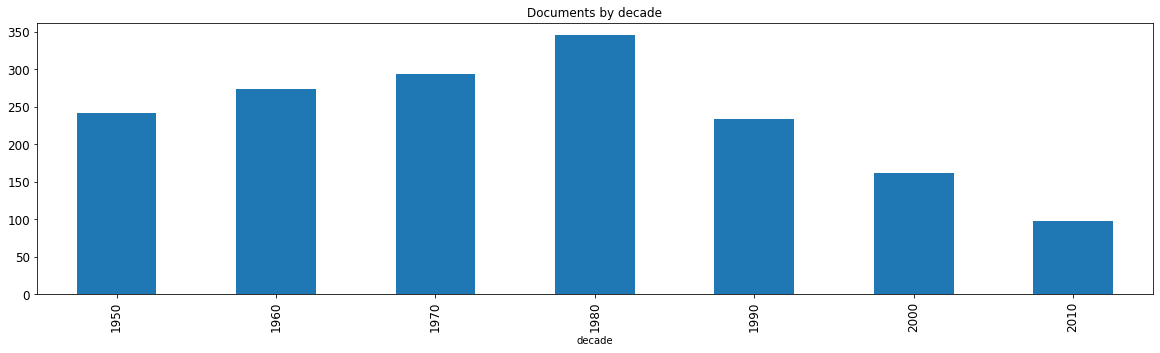

In [27]:
# Group the data by decade and the aggregated number of ids into a bar chart
# There is a weird bug where this cell needs to be run twice to be shown

df.groupby(['decade'])['id'].agg('count').plot.bar(title='Documents by decade', figsize=(20, 5), fontsize=12); 

# Read more about Pandas dataframe plotting here: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

And now let's look at the total page numbers by decade.

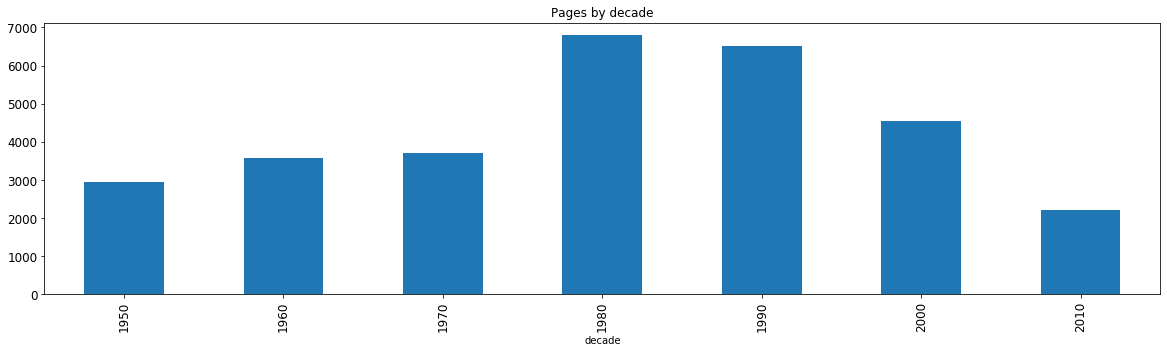

In [28]:
# Group the data by decade and aggregated sum of the page counts into a bar chart

df.groupby(['decade'])['pageCount'].agg('sum').plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12);

___

# Start Next Lesson: [Exploring Word Frequencies](./1-word-frequencies.ipynb)